In [103]:
# Import required libraries and methods/functions
import pandas as pd
from sklearn.preprocessing import StandardScaler, OneHotEncoder 
# OneHotEncoder is not needed if using pd.get_dummies()
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression 
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix

# Load data
telco_demog = pd.read_csv('telecom_demographics.csv')
telco_usage = pd.read_csv('telecom_usage.csv')

# Join data
churn_df = telco_demog.merge(telco_usage, on='customer_id')

# Identify churn rate
churn_rate = churn_df['churn'].value_counts() / len(churn_df)
print(churn_rate)

# Identify categorical variables
print(churn_df.info())

# One Hot Encoding for categorical variables
churn_df = pd.get_dummies(churn_df, columns=['telecom_partner', 'gender', 'state', 'city', 'registration_event'])

# Feature Scaling
scaler = StandardScaler()

# 'customer_id' is not a feature
features = churn_df.drop(['customer_id', 'churn'], axis=1)
features_scaled = scaler.fit_transform(features)

# Target variable
target = churn_df['churn']

# Splitting the dataset
X_train, X_test, y_train, y_test = train_test_split(features_scaled, target, test_size=0.2, random_state=42)

# Instantiate the Logistic Regression
logreg = LogisticRegression(random_state=42)
logreg.fit(X_train, y_train)

# Logistic Regression predictions
logreg_pred = logreg.predict(X_test)

# Logistic Regression evaluation
print(confusion_matrix(y_test, logreg_pred))
print(classification_report(y_test, logreg_pred))

# Instantiate the Random Forest model
rf = RandomForestClassifier(random_state=42)
rf.fit(X_train, y_train)

# Random Forest predictions
rf_pred = rf.predict(X_test)

# Random Forest evaluation
print(confusion_matrix(y_test, rf_pred))
print(classification_report(y_test, rf_pred))

# Which accuracy score is higher? Ridge or RandomForest
higher_accuracy = "RandomForest"

churn
0    0.799538
1    0.200462
Name: count, dtype: float64
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6500 entries, 0 to 6499
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   customer_id         6500 non-null   int64 
 1   telecom_partner     6500 non-null   object
 2   gender              6500 non-null   object
 3   age                 6500 non-null   int64 
 4   state               6500 non-null   object
 5   city                6500 non-null   object
 6   pincode             6500 non-null   int64 
 7   registration_event  6500 non-null   object
 8   num_dependents      6500 non-null   int64 
 9   estimated_salary    6500 non-null   int64 
 10  calls_made          6500 non-null   int64 
 11  sms_sent            6500 non-null   int64 
 12  data_used           6500 non-null   int64 
 13  churn               6500 non-null   int64 
dtypes: int64(9), object(5)
memory usage: 711.1+ KB
None
[[920 

In [28]:
import pandas as pd

# Membaca data dari dua tabel
telecom_usage = pd.read_csv('telecom_usage.csv')
telecom_demographics = pd.read_csv('telecom_demographics.csv')

# Menggabungkan dua tabel berdasarkan kolom 'customer_id'
df = pd.merge(telecom_demographics, telecom_usage, on='customer_id')

# Menghitung jumlah pelanggan yang churn dan tidak churn
churn_counts = df['churn'].value_counts()

# Menampilkan hasil
print("Jumlah pelanggan yang churn:", churn_counts[1])
print("Jumlah pelanggan yang tidak churn:", churn_counts[0])


Jumlah pelanggan yang churn: 1303
Jumlah pelanggan yang tidak churn: 5197


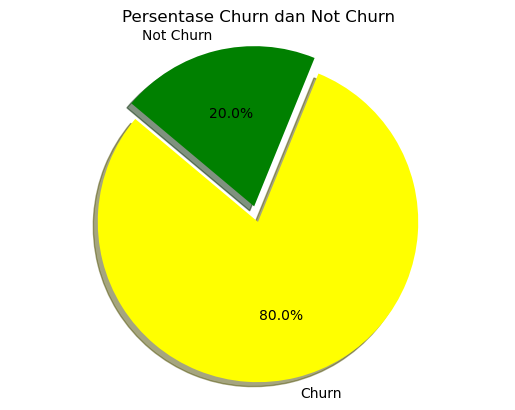

In [31]:
import pandas as pd
import matplotlib.pyplot as plt

# Membaca data dari dua tabel
telecom_usage = pd.read_csv('telecom_usage.csv')
telecom_demographics = pd.read_csv('telecom_demographics.csv')

# Menggabungkan dua tabel berdasarkan kolom 'customer_id'
df = pd.merge(telecom_demographics, telecom_usage, on='customer_id')

# Menghitung jumlah pelanggan yang churn dan tidak churn
churn_counts = df['churn'].value_counts()

# Membuat diagram pie dengan warna hijau dan kuning
labels = ['Churn', 'Not Churn']
sizes = churn_counts.values
colors = ['yellow', 'green']
explode = (0.1, 0)  # Untuk memberikan efek "explode" pada potongan pertama (Churn)

plt.pie(sizes, explode=explode, labels=labels, colors=colors, autopct='%1.1f%%', shadow=True, startangle=140)
plt.axis('equal')  # Memastikan lingkaran berbentuk bulat
plt.title('Persentase Churn dan Not Churn')

# Menampilkan diagram pie
plt.show()


In [97]:
import pandas as pd

# Membaca data dari dua tabel
telecom_usage = pd.read_csv('telecom_usage.csv')
telecom_demographics = pd.read_csv('telecom_demographics.csv')

# Menggabungkan dua tabel berdasarkan kolom 'customer_id'
df = pd.merge(telecom_demographics, telecom_usage, on='customer_id')

# Menghitung distribusi gender berdasarkan kota
gender_city_counts = df.groupby(['city', 'gender']).size().unstack()

# Menambahkan kolom 'Total' untuk menghitung jumlah total pelanggan per kota
gender_city_counts['Total'] = gender_city_counts.sum(axis=1)

# Menambahkan baris 'Total' untuk menghitung jumlah total pelanggan per jenis kelamin
gender_city_counts.loc['Total'] = gender_city_counts.sum()

# Menampilkan hasil distribusi gender berdasarkan kota dengan total
print("Distribusi Gender Berdasarkan Kota dengan Total:")
print(gender_city_counts)


Distribusi Gender Berdasarkan Kota dengan Total:
gender        F     M  Total
city                        
Bangalore   406   660   1066
Chennai     433   660   1093
Delhi       446   682   1128
Hyderabad   436   632   1068
Kolkata     463   592   1055
Mumbai      407   683   1090
Total      2591  3909   6500


In [ ]:
JUMLAH PELANGGAN BERDARSARKAN VARIABEL TERTENTU

In [100]:
import pandas as pd

# Membaca data dari dua tabel
telecom_usage = pd.read_csv('telecom_usage.csv')
telecom_demographics = pd.read_csv('telecom_demographics.csv')

# Menggabungkan dua tabel berdasarkan kolom 'customer_id'
df = pd.merge(telecom_demographics, telecom_usage, on='customer_id')

# Jumlah pelanggan berdasarkan Telecom Partner
telecom_partner_counts = df['telecom_partner'].value_counts()

# Jumlah pelanggan berdasarkan Gender
gender_counts = df['gender'].value_counts()

# Membuat 5 kategori umur
age_bins = [18, 30, 40, 50, 60, 75]
age_labels = ['18-29', '30-39', '40-49', '50-59', '60-75']

# Menambahkan kolom 'Age Group' ke DataFrame
df['Age Group'] = pd.cut(df['age'], bins=age_bins, labels=age_labels)

# Jumlah pelanggan berdasarkan Kategori Umur
age_group_counts = df['Age Group'].value_counts()

# Jumlah pelanggan berdasarkan Kota
city_counts = df['city'].value_counts()

# Jumlah pelanggan berdasarkan Status Churn
churn_counts = df['churn'].value_counts()

# Menampilkan hasil
print("Jumlah Pelanggan Berdasarkan Telecom Partner:")
print(telecom_partner_counts)

print("\nJumlah Pelanggan Berdasarkan Gender:")
print(gender_counts)

print("\nJumlah Pelanggan Berdasarkan Kategori Umur:")
print(age_group_counts)

print("\nJumlah Pelanggan Berdasarkan Kota:")
print(city_counts)

print("\nJumlah Pelanggan Berdasarkan Status Churn:")
print(churn_counts)


Jumlah Pelanggan Berdasarkan Telecom Partner:
telecom_partner
Reliance Jio    1658
BSNL            1635
Vodafone        1609
Airtel          1598
Name: count, dtype: int64

Jumlah Pelanggan Berdasarkan Gender:
gender
M    3909
F    2591
Name: count, dtype: int64

Jumlah Pelanggan Berdasarkan Kategori Umur:
Age Group
60-75    1622
18-29    1347
40-49    1142
30-39    1141
50-59    1125
Name: count, dtype: int64

Jumlah Pelanggan Berdasarkan Kota:
city
Delhi        1128
Chennai      1093
Mumbai       1090
Hyderabad    1068
Bangalore    1066
Kolkata      1055
Name: count, dtype: int64

Jumlah Pelanggan Berdasarkan Status Churn:
churn
0    5197
1    1303
Name: count, dtype: int64


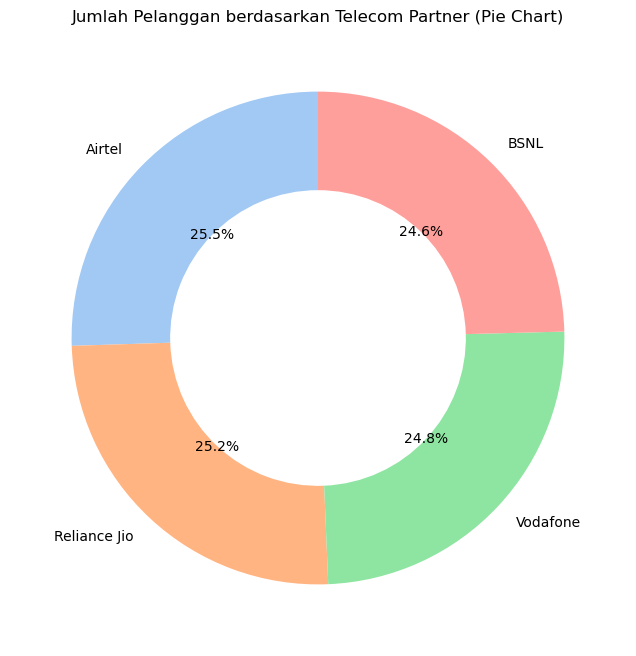

In [79]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Membaca data dari dua tabel
telecom_usage = pd.read_csv('telecom_usage.csv')
telecom_demographics = pd.read_csv('telecom_demographics.csv')

# Menggabungkan dua tabel berdasarkan kolom 'customer_id'
df = pd.merge(telecom_demographics, telecom_usage, on='customer_id')

# Menampilkan diagram pie untuk jumlah pelanggan berdasarkan Telecom Partner
plt.figure(figsize=(10, 8))
colors = sns.color_palette("pastel")[0:len(df['telecom_partner'].unique())]
plt.pie(df['telecom_partner'].value_counts(), labels=df['telecom_partner'].unique(), autopct='%1.1f%%', startangle=90, colors=colors, wedgeprops=dict(width=0.4))

plt.title('Jumlah Pelanggan berdasarkan Telecom Partner (Pie Chart)')
plt.show()

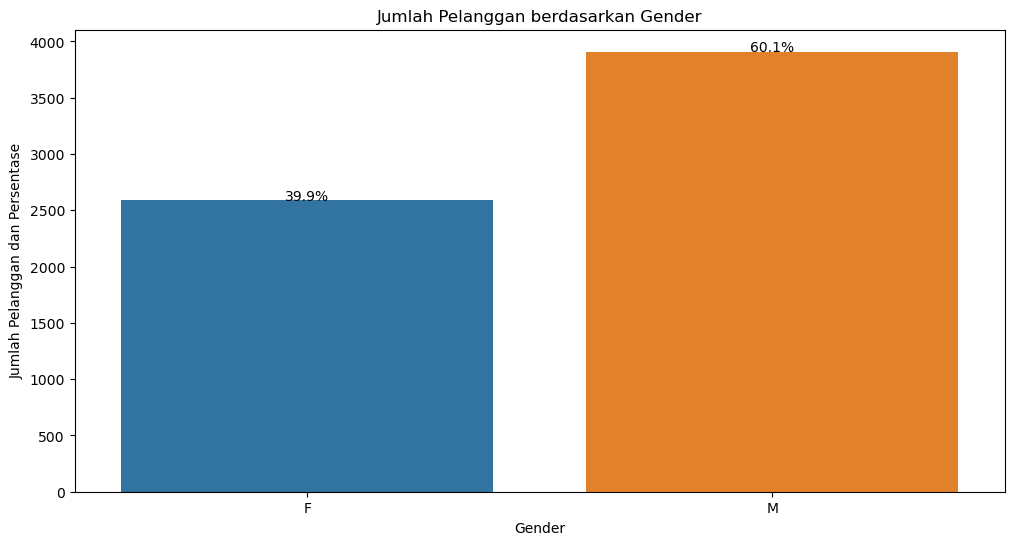

In [81]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Membaca data dari dua tabel
telecom_usage = pd.read_csv('telecom_usage.csv')
telecom_demographics = pd.read_csv('telecom_demographics.csv')

# Menggabungkan dua tabel berdasarkan kolom 'customer_id'
df = pd.merge(telecom_demographics, telecom_usage, on='customer_id')

# Menampilkan bar plot jumlah pelanggan berdasarkan Gender
plt.figure(figsize=(12, 6))
sns.countplot(data=df, x='gender')

# Menambahkan persentase di atas setiap bar
total_data = len(df)
for p in plt.gca().patches:
    height = p.get_height()
    plt.gca().text(p.get_x() + p.get_width() / 2, height + 0.1, f'{height / total_data * 100:.1f}%', ha='center')

plt.title('Jumlah Pelanggan berdasarkan Gender')
plt.xlabel('Gender')
plt.ylabel('Jumlah Pelanggan dan Persentase')
plt.show()


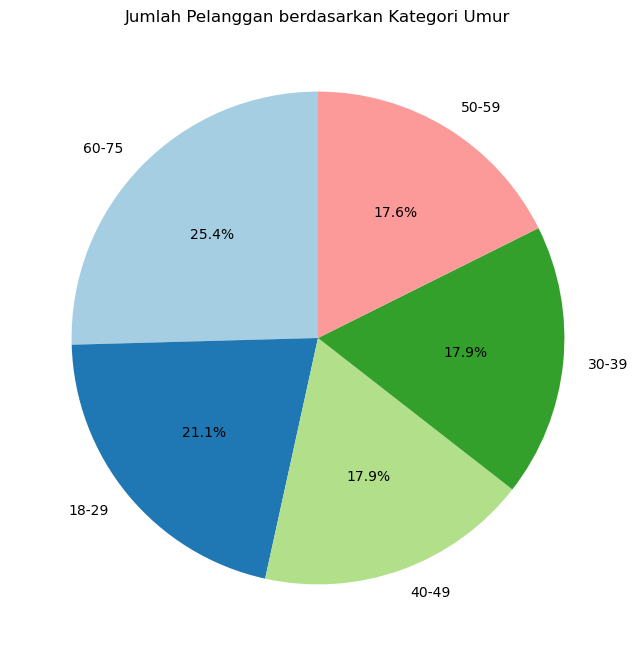

In [78]:
import pandas as pd
import matplotlib.pyplot as plt

# Membaca data dari dua tabel
telecom_usage = pd.read_csv('telecom_usage.csv')
telecom_demographics = pd.read_csv('telecom_demographics.csv')

# Menggabungkan dua tabel berdasarkan kolom 'customer_id'
df = pd.merge(telecom_demographics, telecom_usage, on='customer_id')

# Menentukan kategori umur
bins = [18, 30, 40, 50, 60, 75]
labels = ['18-29', '30-39', '40-49', '50-59', '60-75']

# Menambahkan kolom 'Age Group' ke DataFrame
df['Age Group'] = pd.cut(df['age'], bins=bins, labels=labels)

# Menghitung jumlah pelanggan berdasarkan kategori umur
age_group_counts = df['Age Group'].value_counts()

# Menampilkan diagram pie untuk jumlah pelanggan berdasarkan kategori umur
plt.figure(figsize=(8, 8))
plt.pie(age_group_counts, labels=age_group_counts.index, autopct='%1.1f%%', startangle=90, colors=plt.cm.Paired.colors)
plt.title('Jumlah Pelanggan berdasarkan Kategori Umur')
plt.show()


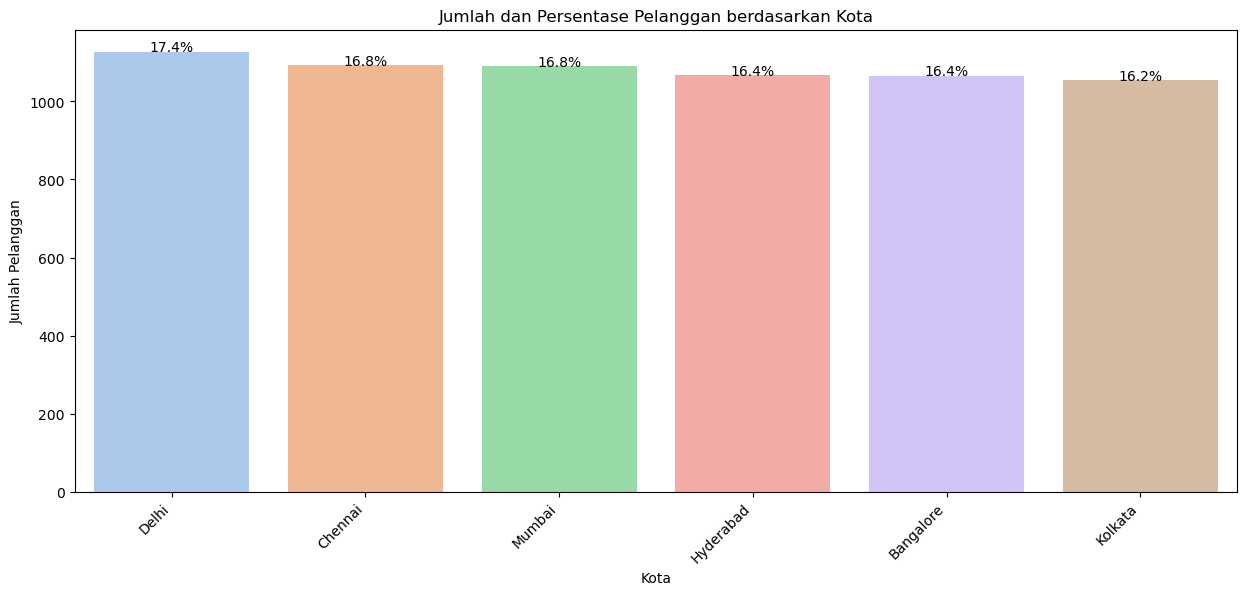

In [89]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Membaca data dari dua tabel
telecom_usage = pd.read_csv('telecom_usage.csv')
telecom_demographics = pd.read_csv('telecom_demographics.csv')

# Menggabungkan dua tabel berdasarkan kolom 'customer_id'
df = pd.merge(telecom_demographics, telecom_usage, on='customer_id')

# Menghitung jumlah pelanggan berdasarkan kota (city)
city_counts = df['city'].value_counts()

# Menampilkan bar plot jumlah pelanggan berdasarkan kota
plt.figure(figsize=(15, 6))
sns.countplot(data=df, x='city', order=city_counts.index, palette='pastel')

# Menambahkan persentase di atas setiap bar
total_data = len(df)
for p in plt.gca().patches:
    height = p.get_height()
    plt.gca().text(p.get_x() + p.get_width() / 2, height + 0.1, f'{height / total_data * 100:.1f}%', ha='center', color='black')

plt.title('Jumlah dan Persentase Pelanggan berdasarkan Kota')
plt.xlabel('Kota')
plt.ylabel('Jumlah Pelanggan')

plt.xticks(rotation=45, ha='right')  # Rotasi label kota untuk penampilan yang lebih baik
plt.show()

In [ ]:
Churn or Not Churn

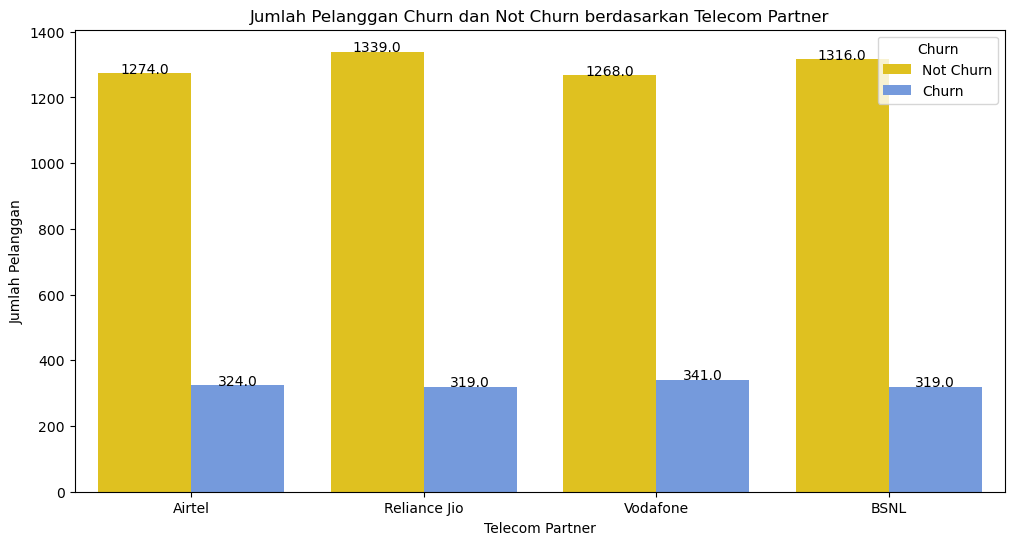

In [84]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Membaca data dari dua tabel
telecom_usage = pd.read_csv('telecom_usage.csv')
telecom_demographics = pd.read_csv('telecom_demographics.csv')

# Menggabungkan dua tabel berdasarkan kolom 'customer_id'
df = pd.merge(telecom_demographics, telecom_usage, on='customer_id')

# Menampilkan bar plot jumlah pelanggan churn dan not churn berdasarkan Telecom Partner
plt.figure(figsize=(12, 6))
colors = ["#FFD700", "#6495ED"]  # Kuning untuk Not Churn, Biru untuk Churn
sns.countplot(data=df, x='telecom_partner', hue='churn', palette=colors)

# Menambahkan label dengan jumlah pelanggan di atas setiap bar
for p in plt.gca().patches:
    height = p.get_height()
    plt.gca().text(p.get_x() + p.get_width() / 2, height + 0.1, f'{height}', ha='center', color='black')

plt.title('Jumlah Pelanggan Churn dan Not Churn berdasarkan Telecom Partner')
plt.xlabel('Telecom Partner')
plt.ylabel('Jumlah Pelanggan')
plt.legend(title='Churn', labels=['Not Churn', 'Churn'])

plt.show()

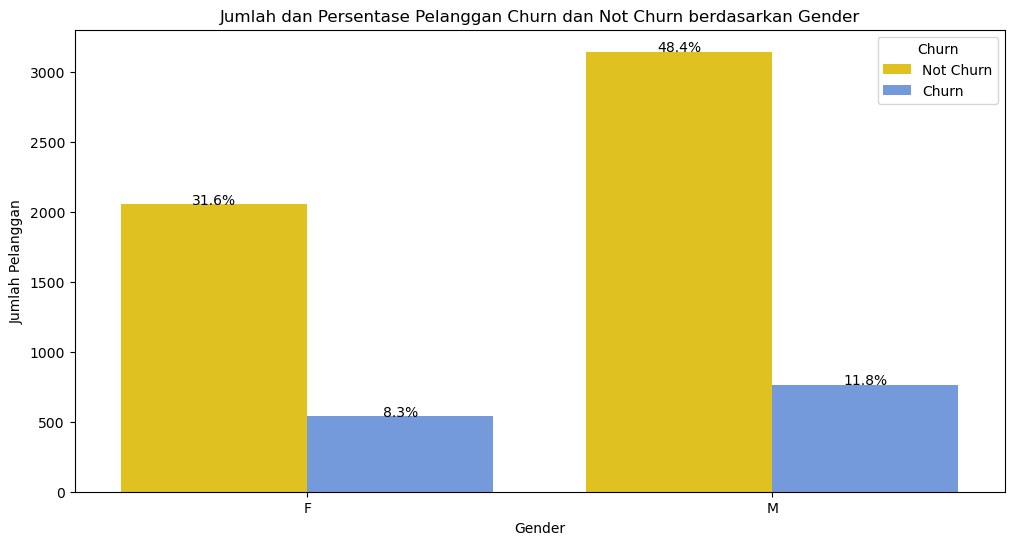

In [86]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Membaca data dari dua tabel
telecom_usage = pd.read_csv('telecom_usage.csv')
telecom_demographics = pd.read_csv('telecom_demographics.csv')

# Menggabungkan dua tabel berdasarkan kolom 'customer_id'
df = pd.merge(telecom_demographics, telecom_usage, on='customer_id')

# Menampilkan bar plot jumlah pelanggan churn dan not churn berdasarkan Gender
plt.figure(figsize=(12, 6))
colors = ["#FFD700", "#6495ED"]  # Kuning untuk Not Churn, Biru untuk Churn
sns.countplot(data=df, x='gender', hue='churn', palette=colors)

# Menambahkan persentase di atas setiap bar
total_data = len(df)
for p in plt.gca().patches:
    height = p.get_height()
    plt.gca().text(p.get_x() + p.get_width() / 2, height + 0.1, f'{height / total_data * 100:.1f}%', ha='center', color='black')

plt.title('Jumlah dan Persentase Pelanggan Churn dan Not Churn berdasarkan Gender')
plt.xlabel('Gender')
plt.ylabel('Jumlah Pelanggan')
plt.legend(title='Churn', labels=['Not Churn', 'Churn'])

plt.show()

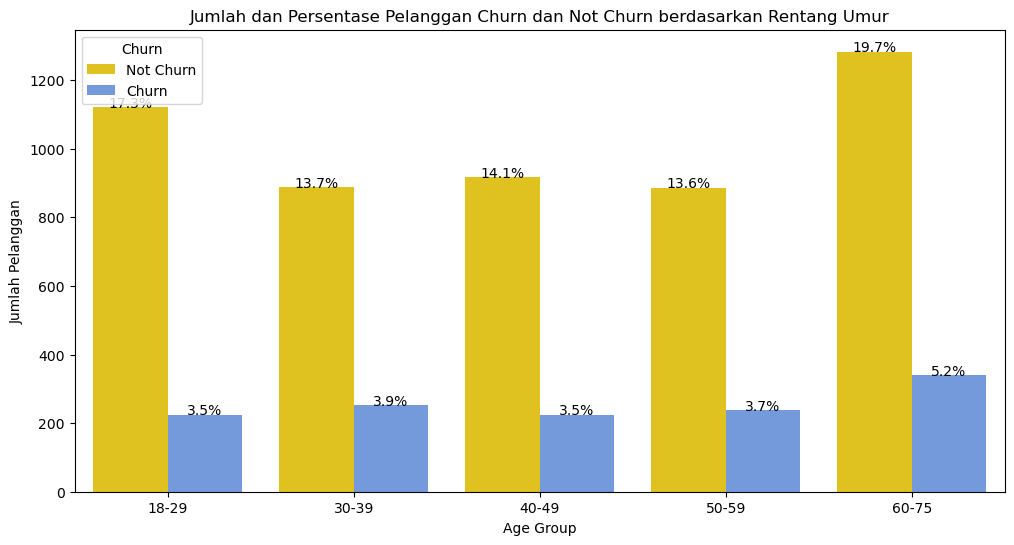

In [87]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Membaca data dari dua tabel
telecom_usage = pd.read_csv('telecom_usage.csv')
telecom_demographics = pd.read_csv('telecom_demographics.csv')

# Menggabungkan dua tabel berdasarkan kolom 'customer_id'
df = pd.merge(telecom_demographics, telecom_usage, on='customer_id')

# Menentukan kategori umur
bins = [18, 30, 40, 50, 60, 75]
labels = ['18-29', '30-39', '40-49', '50-59', '60-75']

# Menambahkan kolom 'Age Group' ke DataFrame
df['Age Group'] = pd.cut(df['age'], bins=bins, labels=labels)

# Menampilkan bar plot jumlah pelanggan churn dan not churn berdasarkan Age Group
plt.figure(figsize=(12, 6))
colors = ["#FFD700", "#6495ED"]  # Kuning untuk Not Churn, Biru untuk Churn
sns.countplot(data=df, x='Age Group', hue='churn', palette=colors, order=labels)

# Menambahkan persentase di atas setiap bar
total_data = len(df)
for p in plt.gca().patches:
    height = p.get_height()
    plt.gca().text(p.get_x() + p.get_width() / 2, height + 0.1, f'{height / total_data * 100:.1f}%', ha='center', color='black')

plt.title('Jumlah dan Persentase Pelanggan Churn dan Not Churn berdasarkan Rentang Umur')
plt.xlabel('Age Group')
plt.ylabel('Jumlah Pelanggan')
plt.legend(title='Churn', labels=['Not Churn', 'Churn'])

plt.show()


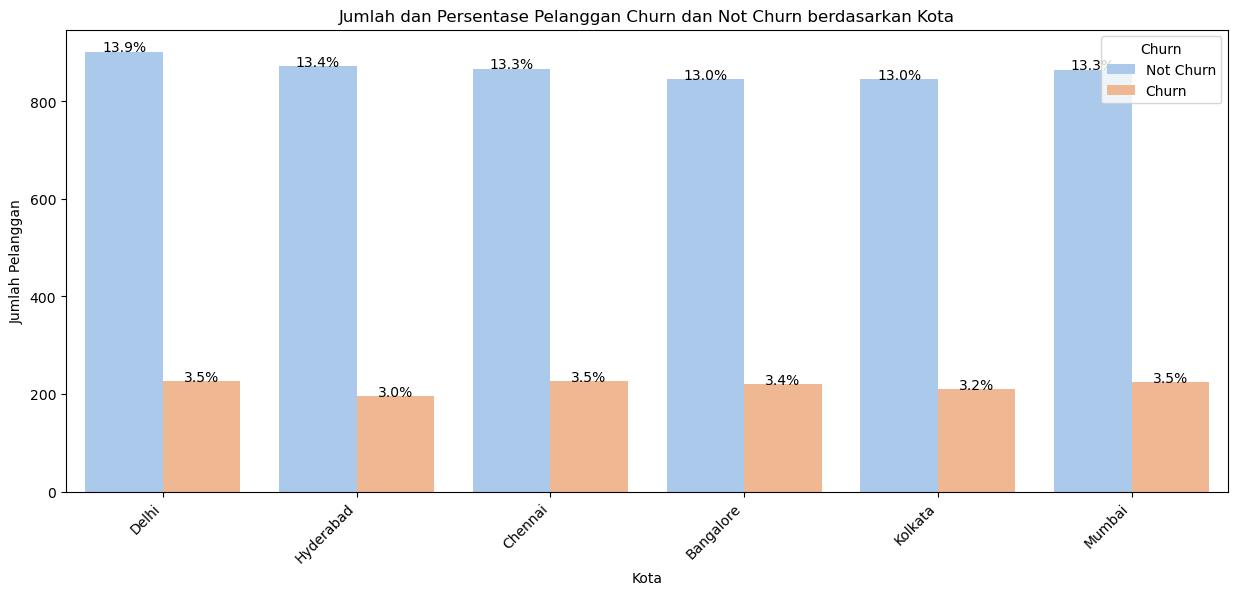

In [90]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Membaca data dari dua tabel
telecom_usage = pd.read_csv('telecom_usage.csv')
telecom_demographics = pd.read_csv('telecom_demographics.csv')

# Menggabungkan dua tabel berdasarkan kolom 'customer_id'
df = pd.merge(telecom_demographics, telecom_usage, on='customer_id')

# Menampilkan bar plot jumlah pelanggan churn dan not churn berdasarkan Kota
plt.figure(figsize=(15, 6))
sns.countplot(data=df, x='city', hue='churn', palette='pastel')

# Menambahkan persentase di atas setiap bar
total_data = len(df)
for p in plt.gca().patches:
    height = p.get_height()
    plt.gca().text(p.get_x() + p.get_width() / 2, height + 0.1, f'{height / total_data * 100:.1f}%', ha='center', color='black')

plt.title('Jumlah dan Persentase Pelanggan Churn dan Not Churn berdasarkan Kota')
plt.xlabel('Kota')
plt.ylabel('Jumlah Pelanggan')
plt.legend(title='Churn', labels=['Not Churn', 'Churn'])

plt.xticks(rotation=45, ha='right')  # Rotasi label kota untuk penampilan yang lebih baik
plt.show()

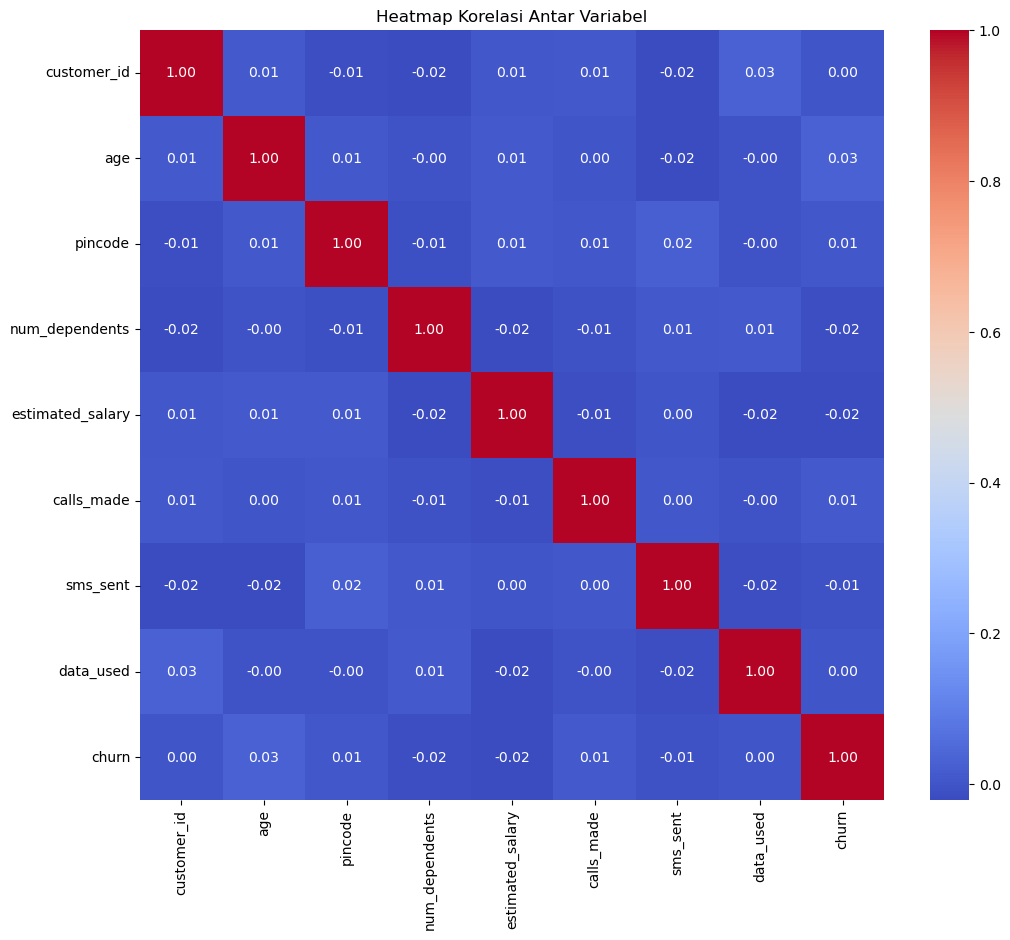

In [92]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Membaca data dari dua tabel
telecom_usage = pd.read_csv('telecom_usage.csv')
telecom_demographics = pd.read_csv('telecom_demographics.csv')

# Menggabungkan dua tabel berdasarkan kolom 'customer_id'
df = pd.merge(telecom_demographics, telecom_usage, on='customer_id')

# Memilih kolom-kolom numerik untuk perhitungan korelasi
numeric_columns = df.select_dtypes(include=['float64', 'int64']).columns
df_numeric = df[numeric_columns]

# Menghitung matriks korelasi
correlation_matrix = df_numeric.corr()

# Menampilkan heatmap korelasi
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")

plt.title('Heatmap Korelasi Antar Variabel')
plt.show()


In [96]:
from scipy.stats import pearsonr
import pandas as pd

# Membaca data dari dua tabel
telecom_usage = pd.read_csv('telecom_usage.csv')
telecom_demographics = pd.read_csv('telecom_demographics.csv')

# Menggabungkan dua tabel berdasarkan kolom 'customer_id'
df = pd.merge(telecom_demographics, telecom_usage, on='customer_id')

# Menghitung korelasi Pearson dan p-value antara 'churn' dan 'estimated_salary'
correlation_coefficient, p_value = pearsonr(df['churn'], df['estimated_salary'])

print(f'Korelasi Pearson antara Churn dan Estimated Salary: {correlation_coefficient:.2f}')
print(f'P-value: {p_value:.5f}')

Korelasi Pearson antara Churn dan Estimated Salary: -0.02
P-value: 0.10840
